# **Study Case : HELP Intenational** <br/> 

<font size="5"> <b> Problem Descriptions </b></font>
 <br />
(---- ***The Following Descriptions Are Written In Indonesian*** ----)  <br />
HELP International telah berhasil mengumpulkan sekitar $ 10 juta. Saat ini, CEO LSM perlu memutuskan bagaimana menggunakan uang ini secara strategis dan efektif. Jadi, CEO harus mengambil keputusan untuk memilih negara yang paling membutuhkan bantuan. Oleh karena itu, tugas pada projek kali ini adalah mengkategorikan negara menggunakan beberapa faktor sosial ekonomi dan kesehatan yang menentukan perkembangan negara secara keseluruhan. Kemudian, tentukan negara mana saja yang paling perlu menjadi fokus CEO.

<font size="5"> <b> Data Dictionary </b></font>
 <br />
(---- ***The Following Specifications Are Written In Indonesian*** ----) 
- Negara : Nama negara
- Kematian_anak: Kematian anak di bawah usia 5 tahun per 1000 kelahiran
- Ekspor : Ekspor barang dan jasa perkapita
- Kesehatan: Total pengeluaran kesehatan perkapita
- Impor: Impor barang dan jasa perkapita
- Pendapatan: Penghasilan bersih perorang
- Inflasi: Pengukuran tingkat pertumbuhan tahunan dari Total GDP 
- Harapan_hidup: Jumlah tahun rata-rata seorang anak yang baru lahir akan hidup jika pola kematian saat ini tetap sama
- Jumlah_fertiliti: Jumlah anak yang akan lahir dari setiap wanita jika tingkat kesuburan usia saat ini tetap sama
- GDPperkapita: GDP per kapita. Dihitung sebagai Total GDP dibagi dengan total populasi.


<font size="5"> <b> Steps </b></font>

1. Reading and Understanding Data
 - Import necessary libraries
 - Read and inspect data
2. Exploratory Data Analysis
 - Data cleansing
 - Univariate Analysis
 - Bivariate Analysis
 - Multivariate Analysis
3. Outliers Treatment
4. Scaling Data
5. Creating KMeans Clustering and Visualizing Clusters Formed
6. Report Countries

# **1. Reading and Understanding Data** <br/> 

#### 1.1 Import necessary libraries

In [23]:
import warnings
warnings.filterwarnings('ignore')

In [24]:
import numpy as np
import pandas as pd

# For Visualisation
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

# For rescaling the data
from sklearn.preprocessing import StandardScaler

# To perform KMeans clustering 
from sklearn.cluster import KMeans

# To check most accurate KMeans clustering
from sklearn.metrics import silhouette_score

#### 1.2 Read and inspect data

In [25]:
df = pd.read_csv('https://drive.google.com/uc?export=download&id=1O6sws-MvbZ1rG2k2izn-DTseKduqiK8j')
df.head()

,Negara,Kematian_anak,Ekspor,Kesehatan,Impor,Pendapatan,Inflasi,Harapan_hidup,Jumlah_fertiliti,GDPperkapita
0,Afghanistan,90.2,10.0,7.58,44.9,1610,9.44,56.2,5.82,553
1,Albania,16.6,28.0,6.55,48.6,9930,4.49,76.3,1.65,4090
2,Algeria,27.3,38.4,4.17,31.4,12900,16.10,76.5,2.89,4460
3,Angola,119.0,62.3,2.85,42.9,5900,22.40,60.1,6.16,3530
4,Antigua and Barbuda,10.3,45.5,6.03,58.9,19100,1.44,76.8,2.13,12200


In [26]:
# Check the bottom 5 rows of dataframe
df.tail()

,Negara,Kematian_anak,Ekspor,Kesehatan,Impor,Pendapatan,Inflasi,Harapan_hidup,Jumlah_fertiliti,GDPperkapita
162,Vanuatu,29.2,46.6,5.25,52.7,2950,2.62,63.0,3.50,2970
163,Venezuela,17.1,28.5,4.91,17.6,16500,45.90,75.4,2.47,13500
164,Vietnam,23.3,72.0,6.84,80.2,4490,12.10,73.1,1.95,1310
165,Yemen,56.3,30.0,5.18,34.4,4480,23.60,67.5,4.67,1310
166,Zambia,83.1,37.0,5.89,30.9,3280,14.00,52.0,5.40,1460


In [27]:
# Check dataframe shape
df.shape

(167, 10)

In [28]:
# Check number of non-null data from each column and their datatype
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 167 entries, 0 to 166
Data columns (total 10 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Negara            167 non-null    object 
 1   Kematian_anak     167 non-null    float64
 2   Ekspor            167 non-null    float64
 3   Kesehatan         167 non-null    float64
 4   Impor             167 non-null    float64
 5   Pendapatan        167 non-null    int64  
 6   Inflasi           167 non-null    float64
 7   Harapan_hidup     167 non-null    float64
 8   Jumlah_fertiliti  167 non-null    float64
 9   GDPperkapita      167 non-null    int64  
dtypes: float64(7), int64(2), object(1)
memory usage: 13.2+ KB


In [29]:
# Check number of unique data in each columns 
df.nunique()

Negara              167
Kematian_anak       139
Ekspor              147
Kesehatan           147
Impor               151
Pendapatan          156
Inflasi             156
Harapan_hidup       127
Jumlah_fertiliti    138
GDPperkapita        157
dtype: int64

Dari rangkaian di atas, kita tahu bahwa setiap data kolom 'negara' adalah unik. Dengan demikian, kerangka data tidak memiliki data duplikat.

**Check data statistic**

In [30]:
df.describe()

,Kematian_anak,Ekspor,Kesehatan,Impor,Pendapatan,Inflasi,Harapan_hidup,Jumlah_fertiliti,GDPperkapita
count,167.000000,167.000000,167.000000,167.000000,167.000000,167.000000,167.000000,167.000000,167.000000
mean,38.270060,41.108976,6.815689,46.890215,17144.688623,7.781832,70.555689,2.947964,12964.155689
std,40.328931,27.412010,2.746837,24.209589,19278.067698,10.570704,8.893172,1.513848,18328.704809
min,2.600000,0.109000,1.810000,0.065900,609.000000,-4.210000,32.100000,1.150000,231.000000
25%,8.250000,23.800000,4.920000,30.200000,3355.000000,1.810000,65.300000,1.795000,1330.000000
50%,19.300000,35.000000,6.320000,43.300000,9960.000000,5.390000,73.100000,2.410000,4660.000000
75%,62.100000,51.350000,8.600000,58.750000,22800.000000,10.750000,76.800000,3.880000,14050.000000
max,208.000000,200.000000,17.900000,174.000000,125000.000000,104.000000,82.800000,7.490000,105000.000000


# **2. Exploratory Data Analysis** <br/> 


#### 2.2 Data cleansing

**Check and handle null values**

In [31]:
df.isna().sum()

Negara              0
Kematian_anak       0
Ekspor              0
Kesehatan           0
Impor               0
Pendapatan          0
Inflasi             0
Harapan_hidup       0
Jumlah_fertiliti    0
GDPperkapita        0
dtype: int64

Dari seri di atas, kita tahu bahwa kerangka data tidak memiliki nilai null. Oleh karena itu, kita dapat melanjutkan ke langkah berikutnya.

#### 2.3 Univariate Analysis

Analisis univariat merupakan analisis yang digunakan pada satu variabel dengan tujuan untuk mengetahui dan mengidentifikasi karakteristik dari variabel tersebut.



#### tujuan dari analisis univariat: 
1. Mengetahui karakteristik data.

    Berbicara karakteristik, kita bisa melihat apakah data yang kita gunakan sekilas berdistribusi normal, menceng kiri, menceng kanan, terdapat outlier, dll.
    
2. Mengetahui ukuran pemusatan, ukuran penyebaran, dan statistik deskriptif lain dari sebuah data data
 
3. Melakukan pengambilan kesimpulan

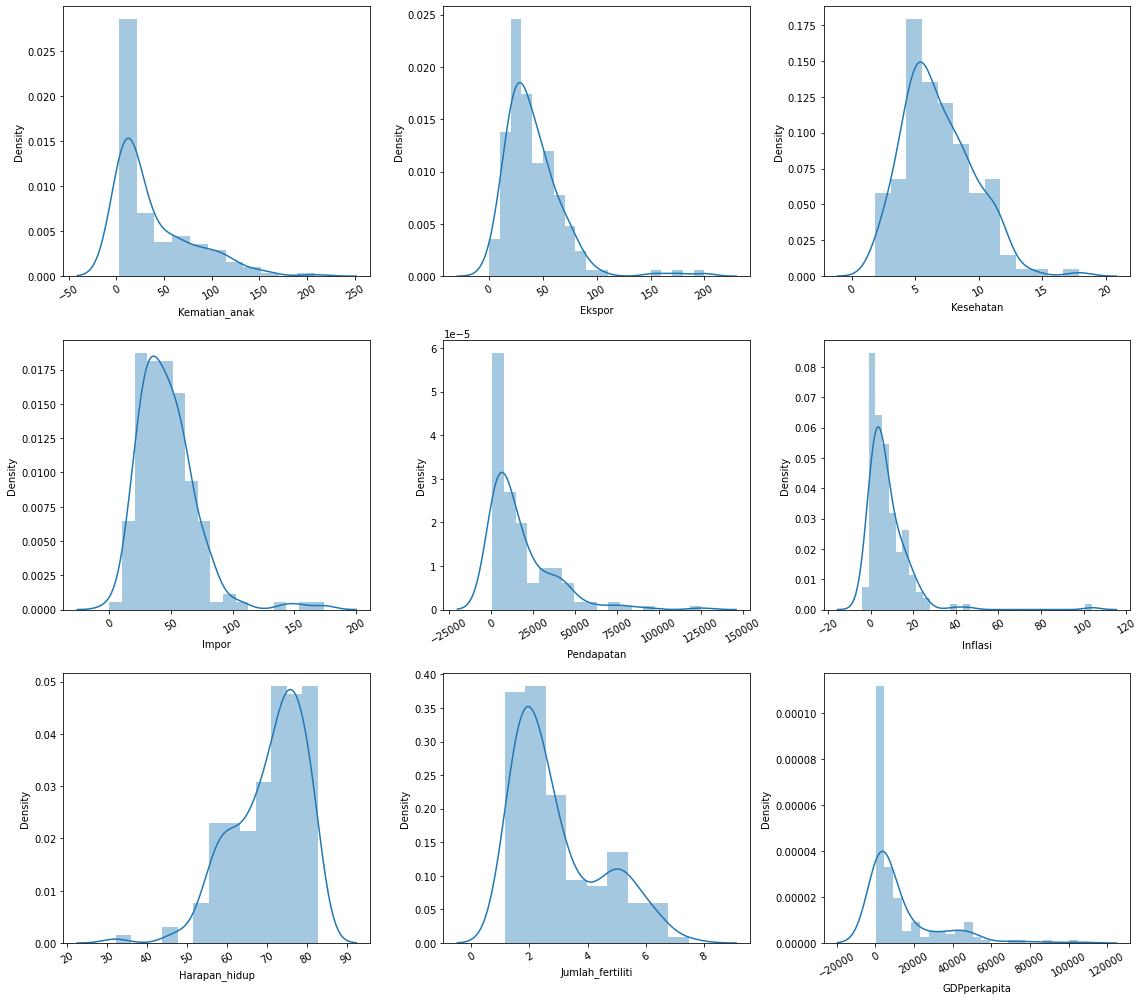

In [32]:
# visualisasi kolom numerik dengan distribusi plot
plt.figure(figsize=(16,14))

for i in enumerate(df.describe().columns):
  plt.subplot(3, 3, i[0]+1)
  sns.distplot(df[i[1]])
  plt.xticks(rotation=30)
    
plt.tight_layout()
plt.show()

Dari plot distribusi di atas, kita bisa mendapatkan beberapa wawasan. <br />
* Kita dapat melihat bahwa terdapat outlier dalam distribusi data dari setiap fitur.
* Kita juga dapat melihat bahwa setiap plot distribusi yang mewakili suatu fitur cenderung memiliki kemiringan ke kanan atau ke kiri. Fakta bahwa mereka memiliki kecondongan menunjukkan bahwa ada kesenjangan yang cukup besar antara negara-negara maju dan negara-negara terbelakang.

#### Outlier
Outlier atau pencilan, merupakan suatu observasi pada kumpulan data yang berbeda polanya atau nilainya dari observasi-observasi lainya pada kumpulan data tersebut.

Contoh sederhana jika pada suatu kelas memiliki nilai hasil ujian yaitu: 50, 54, 62, 50, 52, 59, 61, 63, 65, 10, 53, 63, 65, 50, 59, 62, 50, 51, 57, 60, 63, 65, 65, 53, 99. Nilai dari 25 siswa ini terdapat dua anak yang memiliki nilai ekstrim yaitu nilai 10 dan 99, kedua nilai inilah yang dapat dikatakan sebagai nilai outlier.

#### Penyebab Munculnya Outlier :
. Adanya kesalahan prosedur dalam memasukkan data

. Kesalahan dalam pengukuran atau analisis

. Adanya keadaan yang benar-benar khusus, seperti pandangan responden terhadap sesuatu yang menyimpang dikarenakan adanya suatu alasan yang tidak diketahui oleh peneliti sendiri.

#### 2.4 Bivariate Analysis

Analisis bivariat merupakan analisis yang dilakukan untuk mengetahui hubungan antara 2 variabel.


(---- ***Plots Color Description*** ----) <br/>
<font color='tomato'>Tomato-red</font> : Prioritas bantuan dalam kriteria tertentu <br/>
<font color='mediumslateblue'>Mediumslate-blue</font> : Bukan prioritas dalam kriteria tertentu

In [39]:
def bar_plotting(n, data, ycol, xcol, newtitle, x_label, color):
    plt.subplot(1,2,n) # row, col, this plot is the first/second plot
    sns.barplot(y=ycol, x=xcol, data=data, color=color)
    plt.title(newtitle)
    plt.xlabel(x_label)
    plt.ylabel(None)
    sns.despine(left=True)
    return


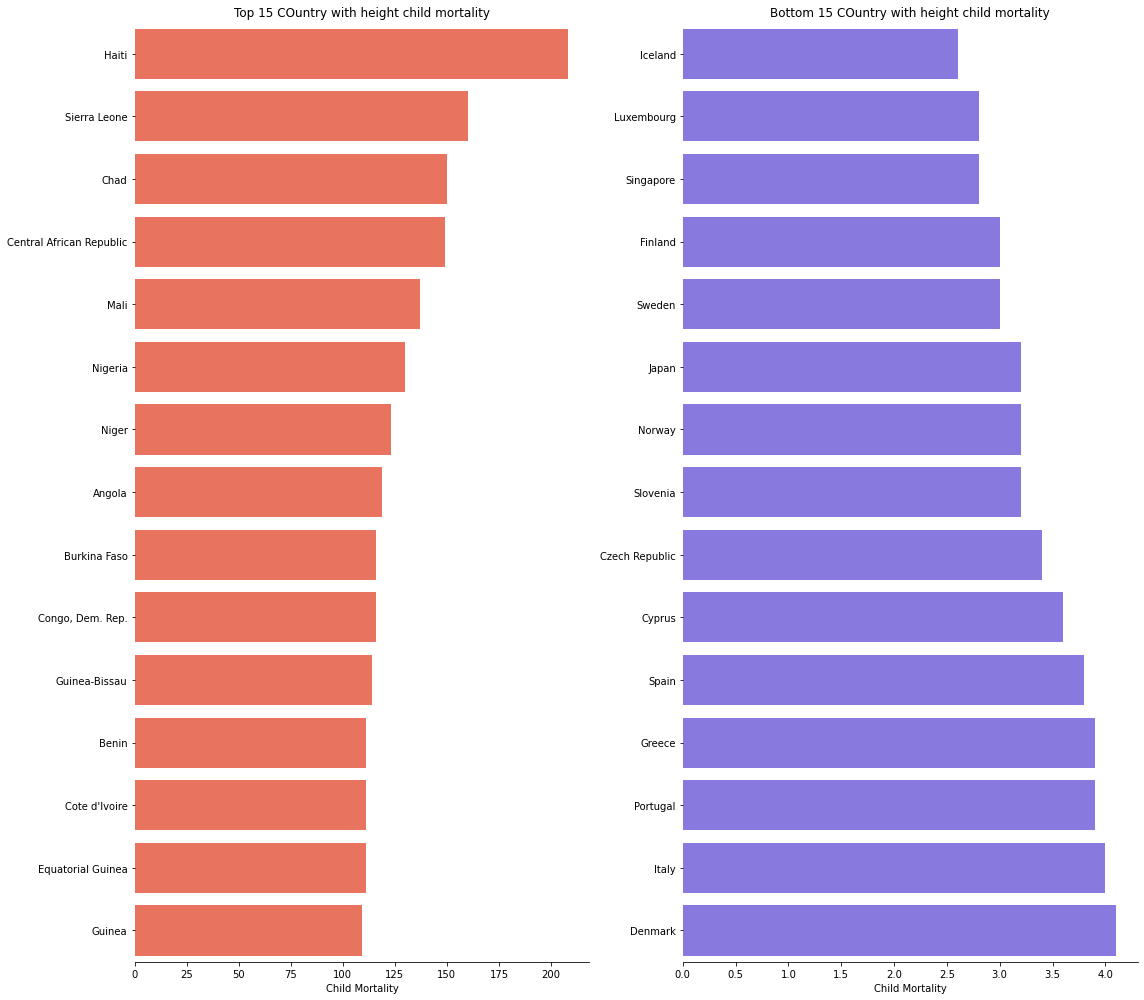

In [42]:
# Visulalize top 15 country and bottom 15 country with the highest child mortality
plt.figure(figsize=(16,14))
cmt_df = df.nlargest(15, columns=['Kematian_anak'])
cml_df = df.nsmallest(15, columns=['Kematian_anak'])
   
bar_plotting(1, cmt_df, 'Negara', 'Kematian_anak' , 'Top 15 COuntry with height child mortality', 'Child Mortality','tomato')
bar_plotting(2, cml_df, 'Negara','Kematian_anak', 'Bottom 15 COuntry with height child mortality', 'Child Mortality','mediumslateblue')

plt.tight_layout()
plt.show()

Dari bar plot di atas, kita bisa mendapatkan beberapa insight.. <br />
* Kita dapat melihat bahwa Haiti memiliki angka kematian anak tertinggi.
* Kita juga dapat melihat bahwa Islandia memiliki tingkat kematian anak terendah.

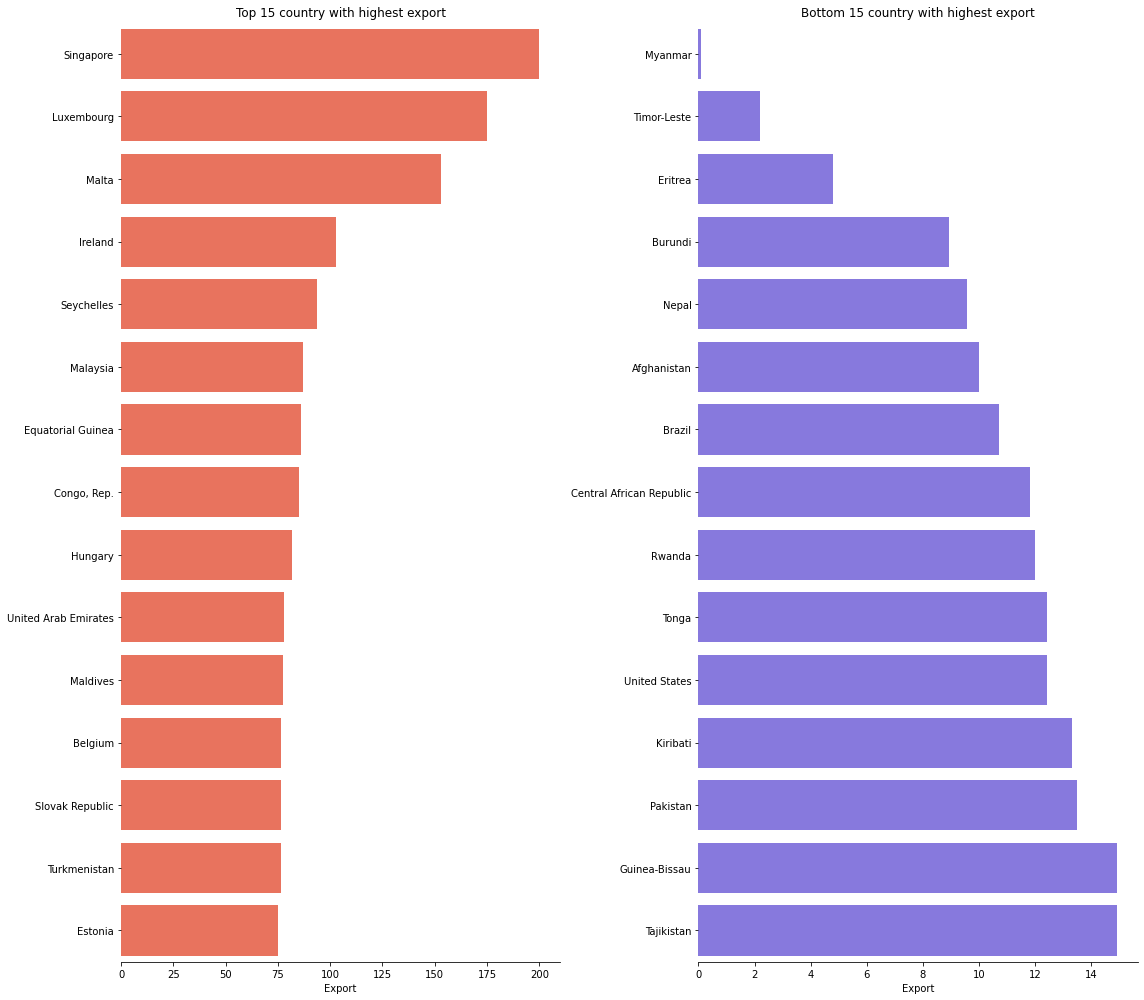

In [45]:
# Visualize top 15 country and bottom 15 country with highest export
plt.figure(figsize=(16,14))
cmt_df = df.nlargest(15, columns=['Ekspor'])
cml_df = df.nsmallest(15, columns=['Ekspor'])
   
bar_plotting(1, cmt_df, 'Negara', 'Ekspor' , 'Top 15 country with highest export', 'Export','tomato')
bar_plotting(2, cml_df, 'Negara','Ekspor', 'Bottom 15 country with highest export', 'Export','mediumslateblue')

plt.tight_layout()
plt.show()

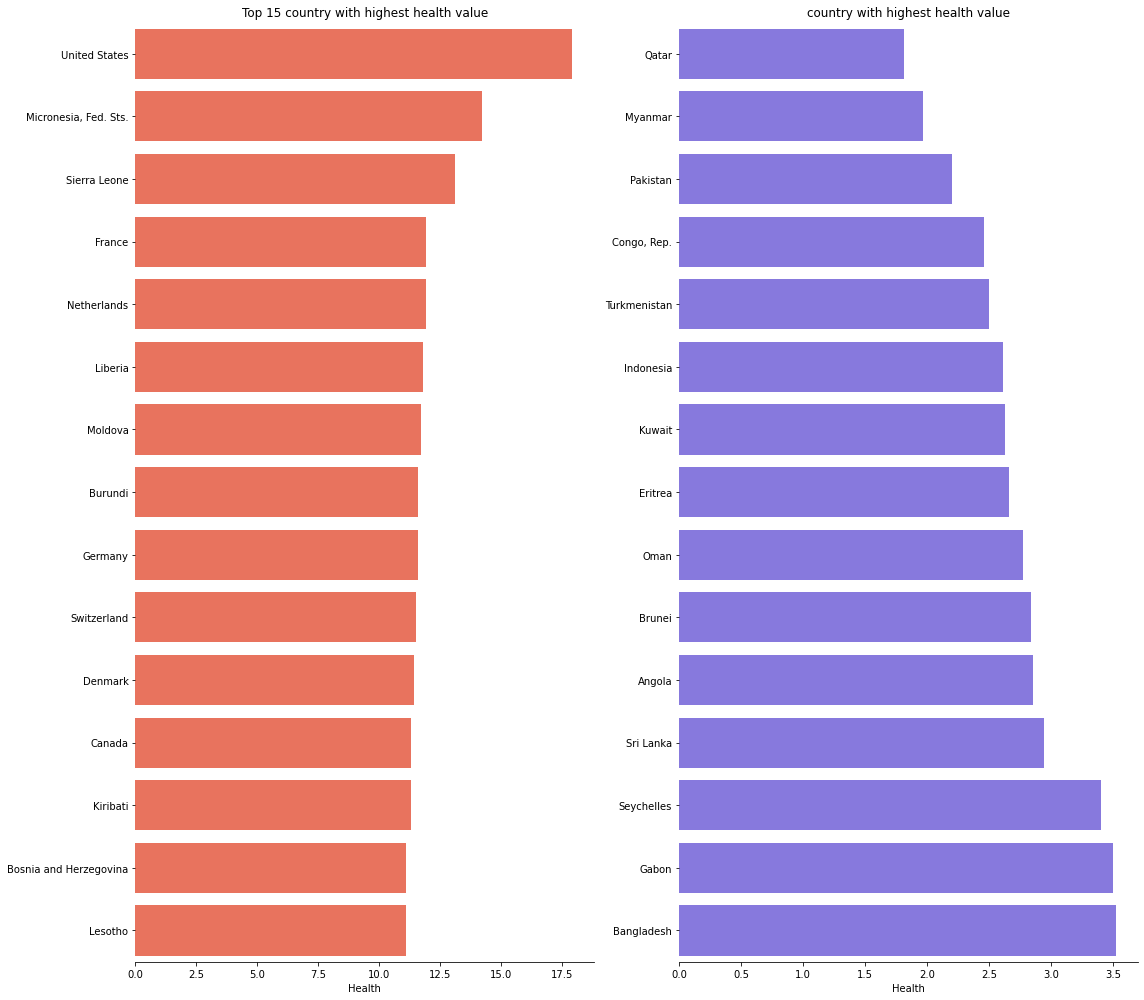

In [46]:
# Visualize top 15 country and bottom 15 country with highest health value
plt.figure(figsize=(16,14))
cmt_df = df.nlargest(15, columns=['Kesehatan'])
cml_df = df.nsmallest(15, columns=['Kesehatan'])
   
bar_plotting(1, cmt_df, 'Negara', 'Kesehatan' , 'Top 15 country with highest health value', 'Health','tomato')
bar_plotting(2, cml_df, 'Negara','Kesehatan', 'country with highest health value', 'Health','mediumslateblue')

plt.tight_layout()
plt.show()

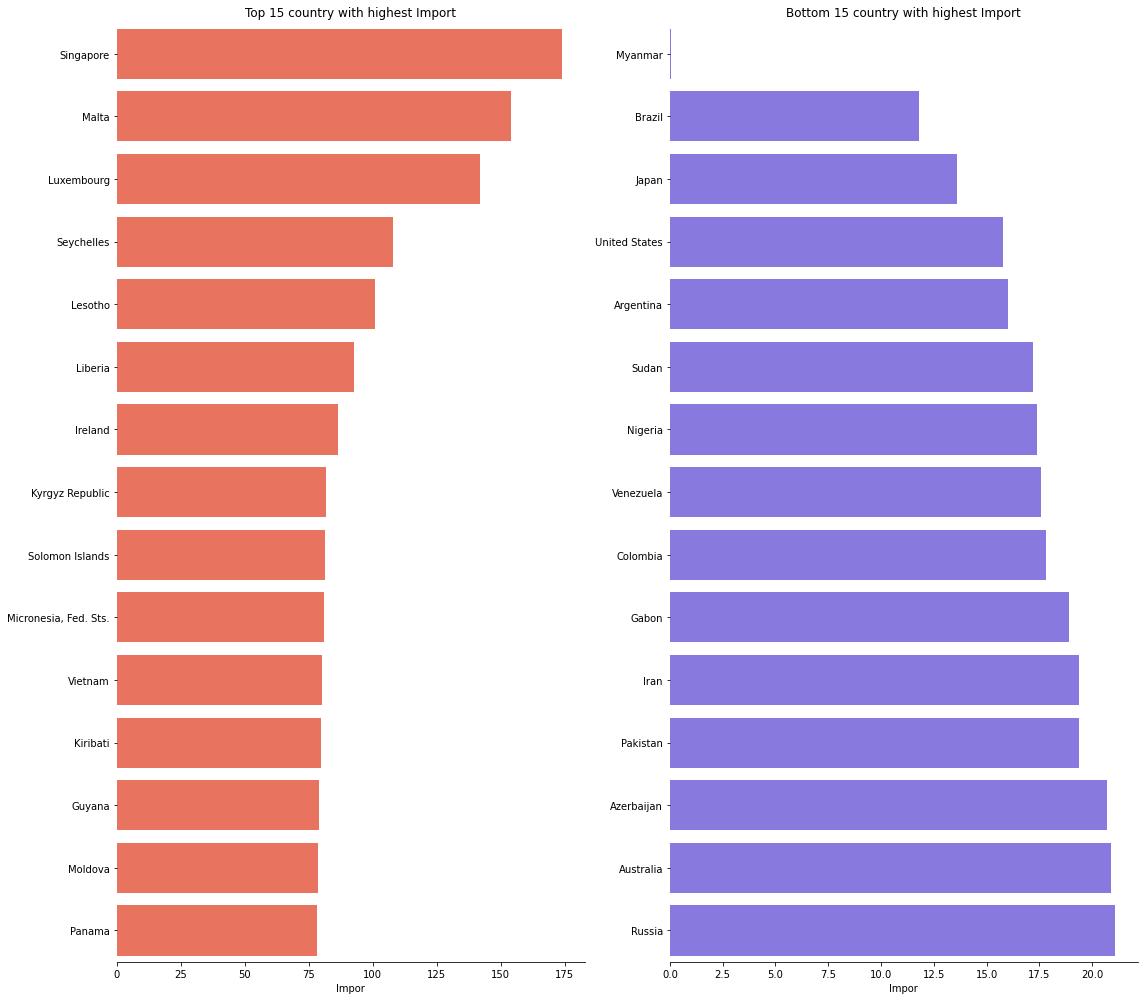

In [47]:
# Visualize top 15 country and bottom 15 country with highest Import
plt.figure(figsize=(16,14))
cmt_df = df.nlargest(15, columns=['Impor'])
cml_df = df.nsmallest(15, columns=['Impor'])
   
bar_plotting(1, cmt_df, 'Negara', 'Impor' , 'Top 15 country with highest Import', 'Impor','tomato')
bar_plotting(2, cml_df, 'Negara','Impor', 'Bottom 15 country with highest Import', 'Impor','mediumslateblue')

plt.tight_layout()
plt.show()

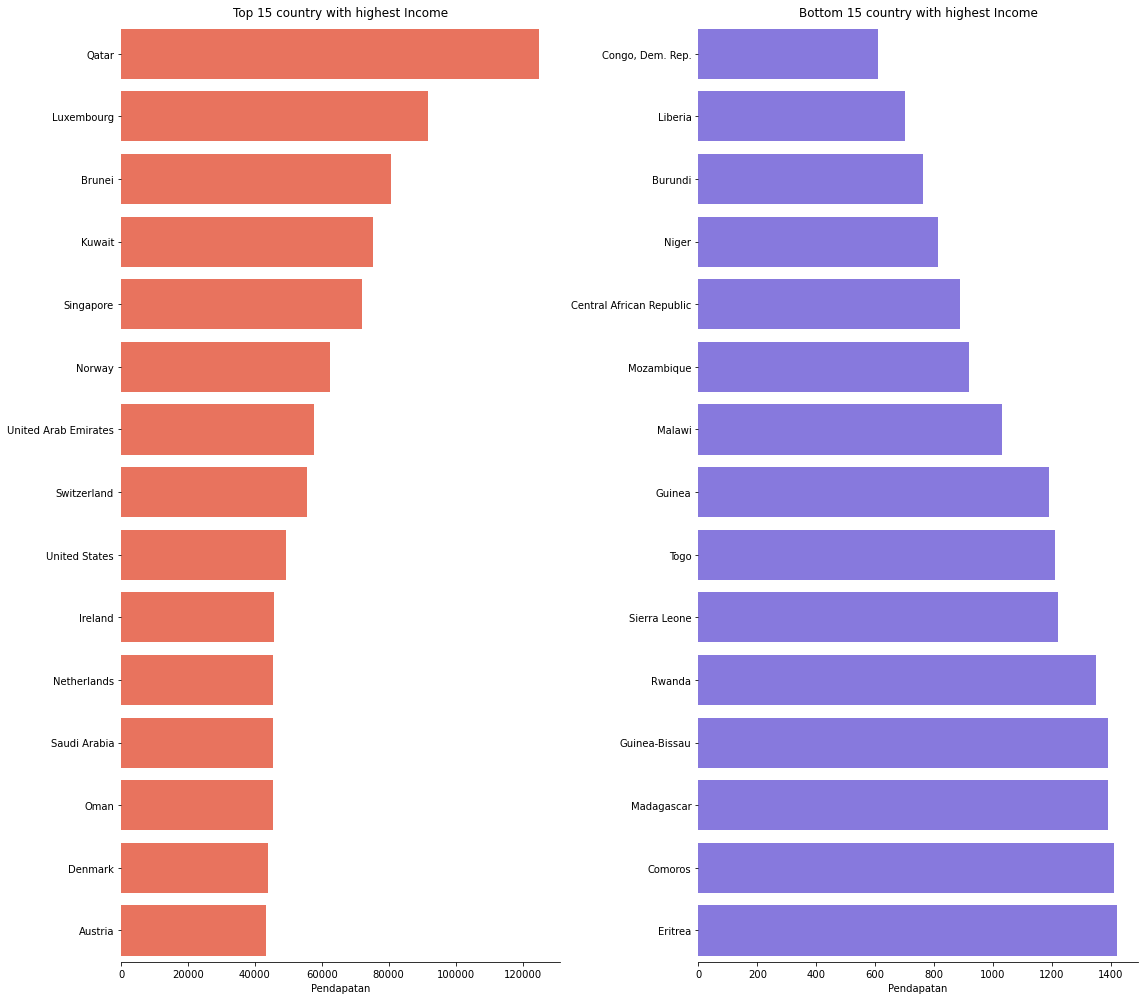

In [48]:
# Visualize top 15 country and bottom 15 country with highest Income
plt.figure(figsize=(16,14))
cmt_df = df.nlargest(15, columns=['Pendapatan'])
cml_df = df.nsmallest(15, columns=['Pendapatan'])
   
bar_plotting(1, cmt_df, 'Negara', 'Pendapatan' , 'Top 15 country with highest Income', 'Pendapatan','tomato')
bar_plotting(2, cml_df, 'Negara','Pendapatan', 'Bottom 15 country with highest Income', 'Pendapatan','mediumslateblue')

plt.tight_layout()
plt.show()

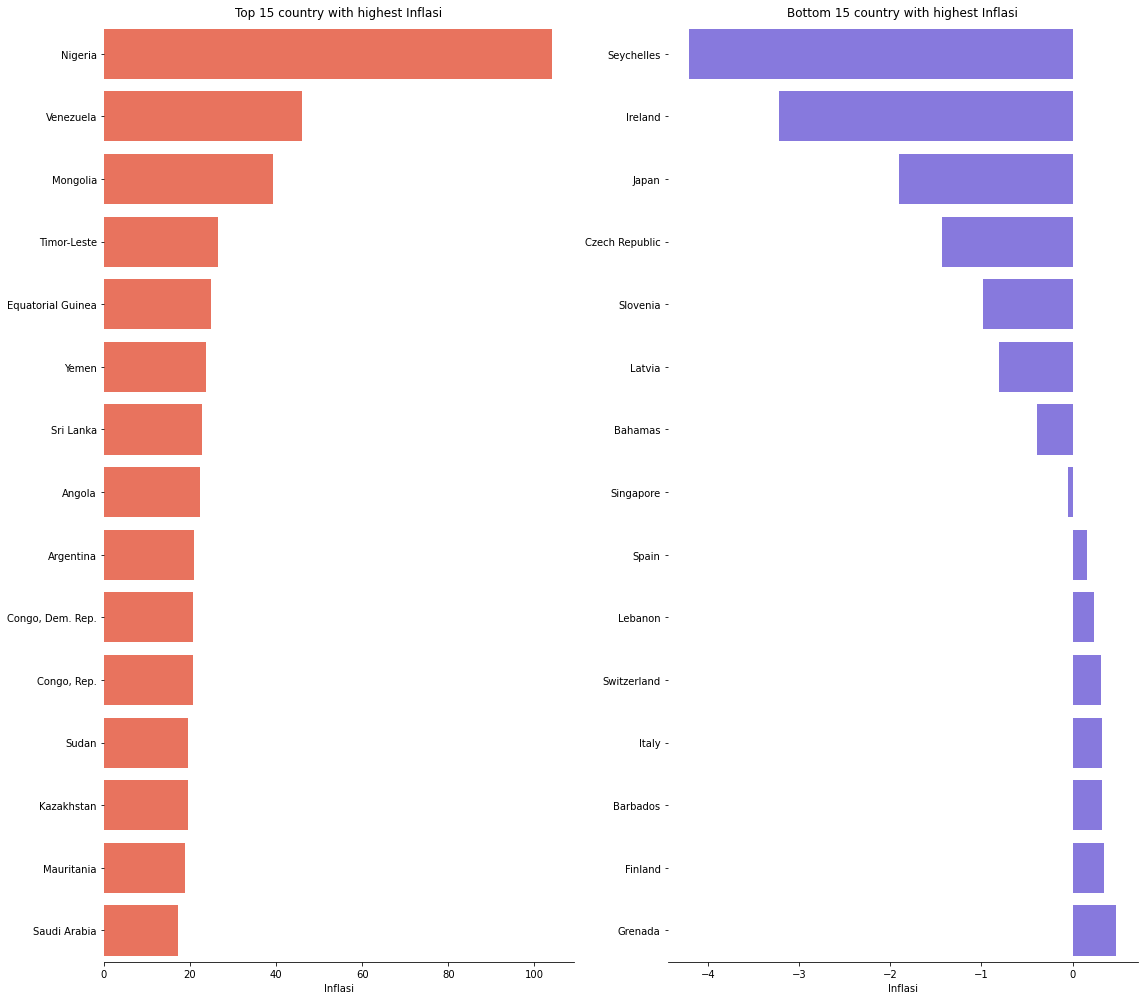

In [49]:
# Visualize top 15 country and bottom 15 country with highest Inflasi
plt.figure(figsize=(16,14))
cmt_df = df.nlargest(15, columns=['Inflasi'])
cml_df = df.nsmallest(15, columns=['Inflasi'])
   
bar_plotting(1, cmt_df, 'Negara', 'Inflasi' , 'Top 15 country with highest Inflasi', 'Inflasi','tomato')
bar_plotting(2, cml_df, 'Negara','Inflasi', 'Bottom 15 country with highest Inflasi', 'Inflasi','mediumslateblue')

plt.tight_layout()
plt.show()

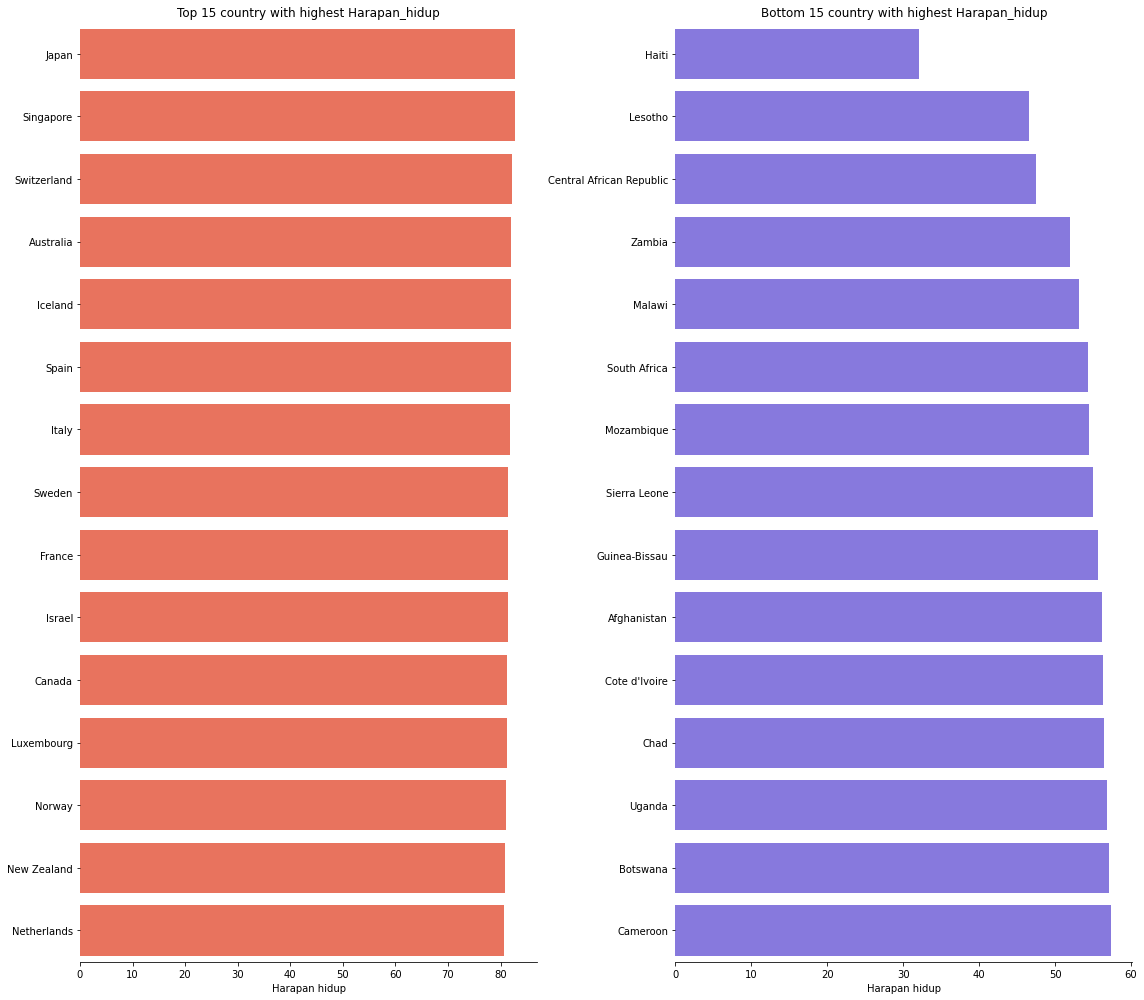

In [51]:
# Visualize top 15 country and bottom 15 country with highest Harapan_hidup
plt.figure(figsize=(16,14))
cmt_df = df.nlargest(15, columns=['Harapan_hidup'])
cml_df = df.nsmallest(15, columns=['Harapan_hidup'])
   
bar_plotting(1, cmt_df, 'Negara', 'Harapan_hidup' , 'Top 15 country with highest Harapan_hidup', 'Harapan hidup','tomato')
bar_plotting(2, cml_df, 'Negara','Harapan_hidup', 'Bottom 15 country with highest Harapan_hidup', 'Harapan hidup','mediumslateblue')

plt.tight_layout()
plt.show()

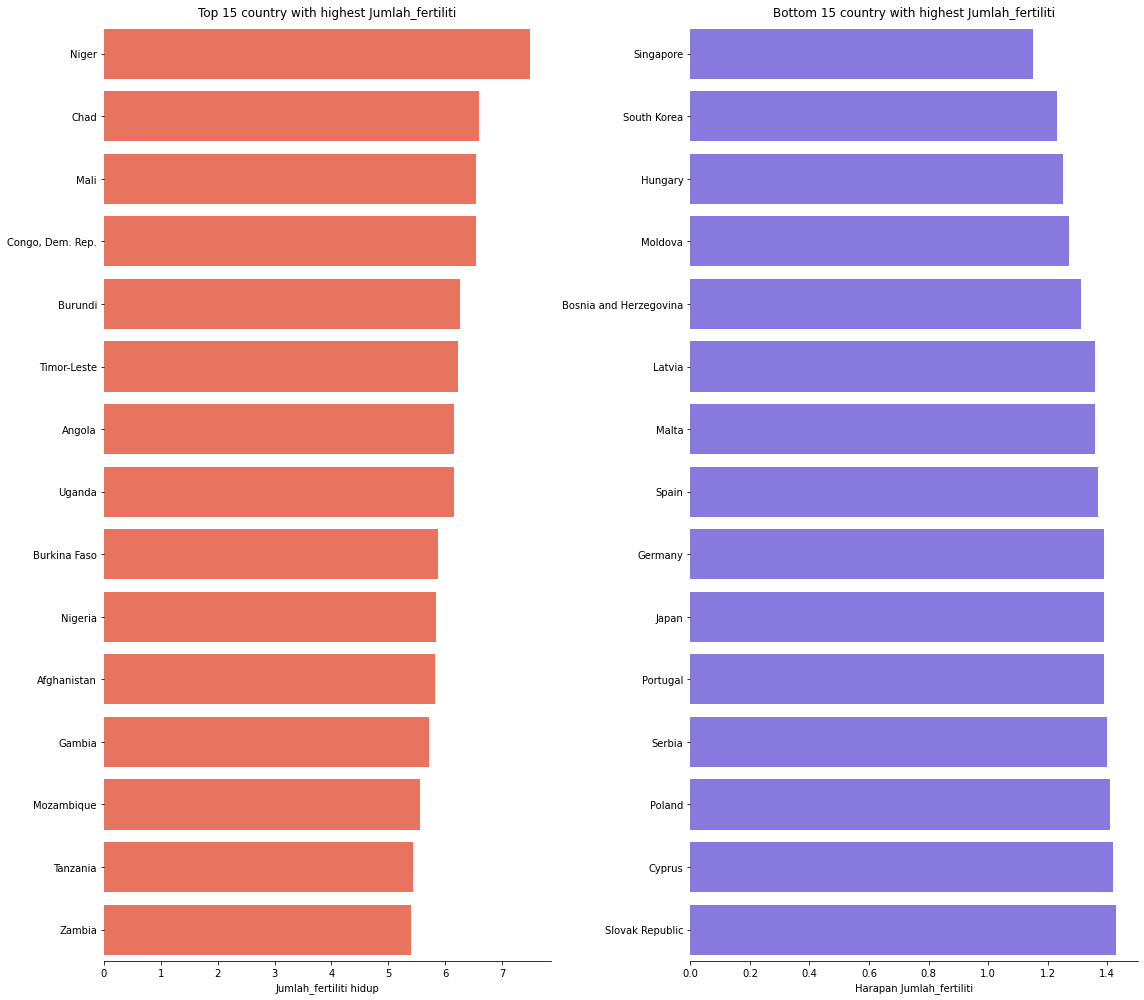

In [52]:
# Visualize top 15 country and bottom 15 country with highest Jumlah_fertiliti
plt.figure(figsize=(16,14))
cmt_df = df.nlargest(15, columns=['Jumlah_fertiliti'])
cml_df = df.nsmallest(15, columns=['Jumlah_fertiliti'])
   
bar_plotting(1, cmt_df, 'Negara', 'Jumlah_fertiliti' , 'Top 15 country with highest Jumlah_fertiliti', 'Jumlah_fertiliti hidup','tomato')
bar_plotting(2, cml_df, 'Negara','Jumlah_fertiliti', 'Bottom 15 country with highest Jumlah_fertiliti', 'Harapan Jumlah_fertiliti','mediumslateblue')

plt.tight_layout()
plt.show()

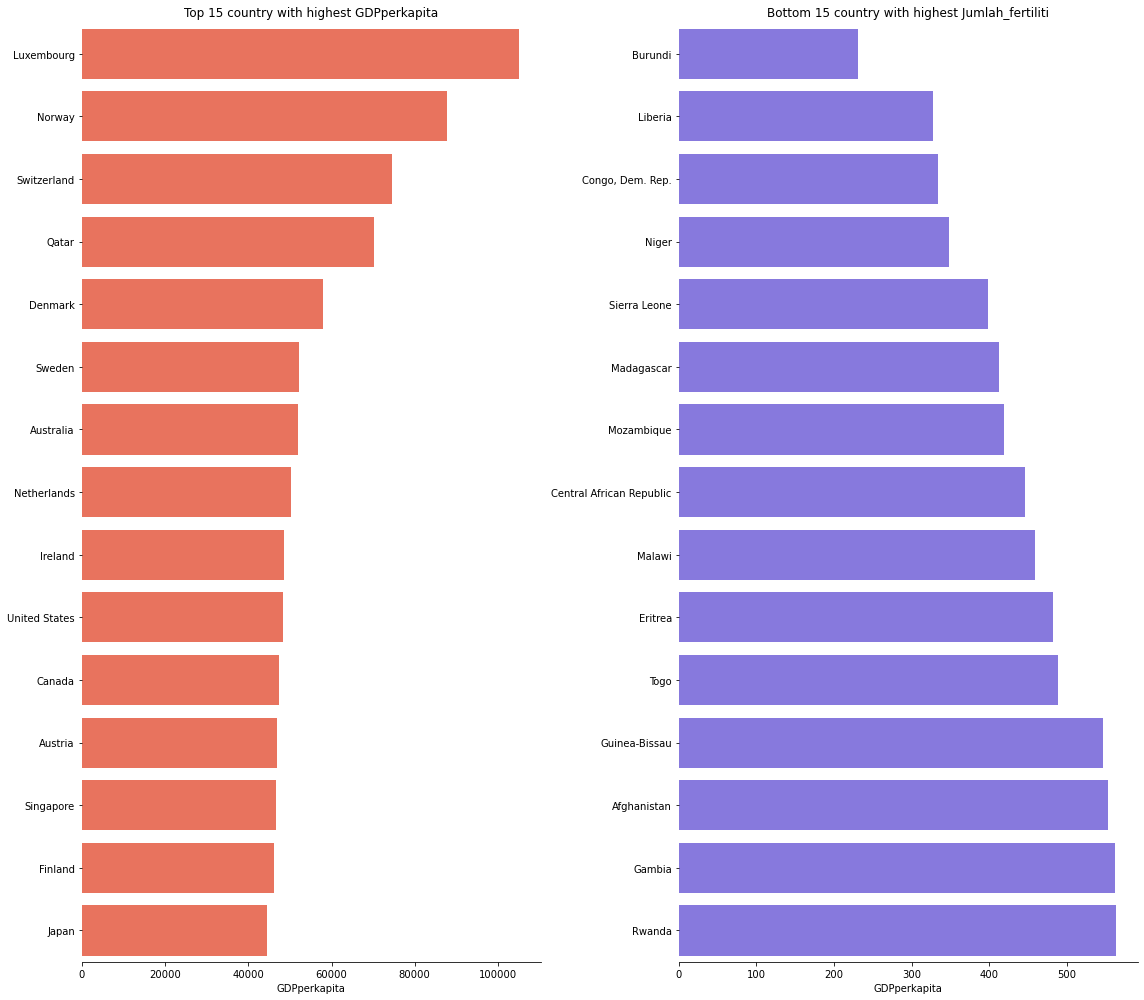

In [53]:
# Visualize top 15 country and bottom 15 country with highest GDPperkapita
plt.figure(figsize=(16,14))
cmt_df = df.nlargest(15, columns=['GDPperkapita'])
cml_df = df.nsmallest(15, columns=['GDPperkapita'])
   
bar_plotting(1, cmt_df, 'Negara', 'GDPperkapita' , 'Top 15 country with highest GDPperkapita', 'GDPperkapita','tomato')
bar_plotting(2, cml_df, 'Negara','GDPperkapita', 'Bottom 15 country with highest Jumlah_fertiliti', 'GDPperkapita','mediumslateblue')

plt.tight_layout()
plt.show()

#### 2.5 Multivariate Analysis

analisis multivariat sebagai metode pengolahan variabel data dengan jumlah jamak dan bertujuan untuk mencari korelasi antar variabel terhadap objek secara bersamaan dan simultan. 

<Figure size 1152x1008 with 0 Axes>

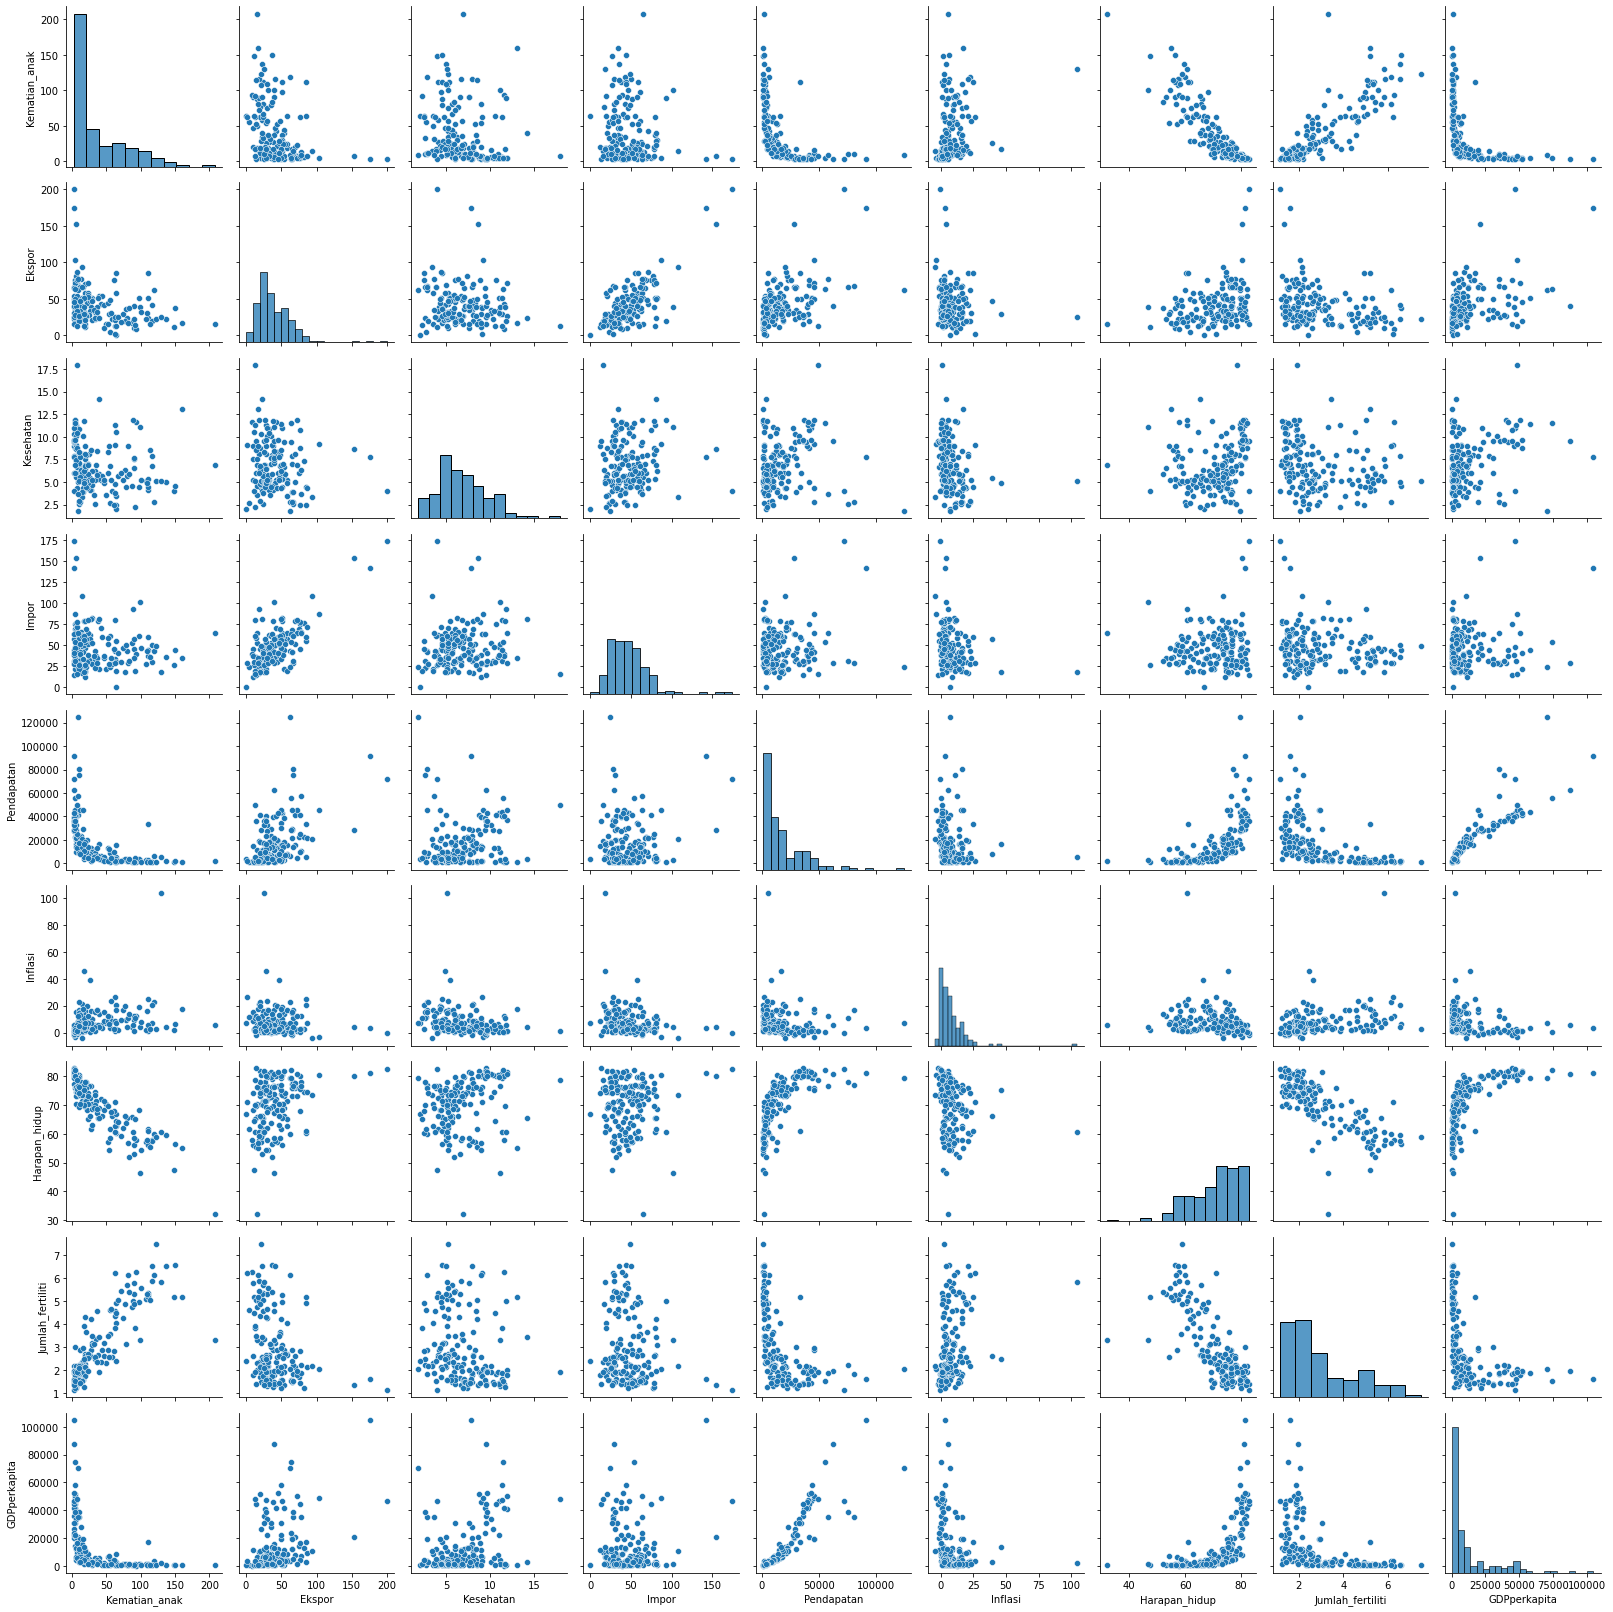

In [54]:
# Visualize data with pairplot to show connections between variables
plt.figure(figsize=(16,14))
sns.pairplot(df)
plt.tight_layout()
plt.show()

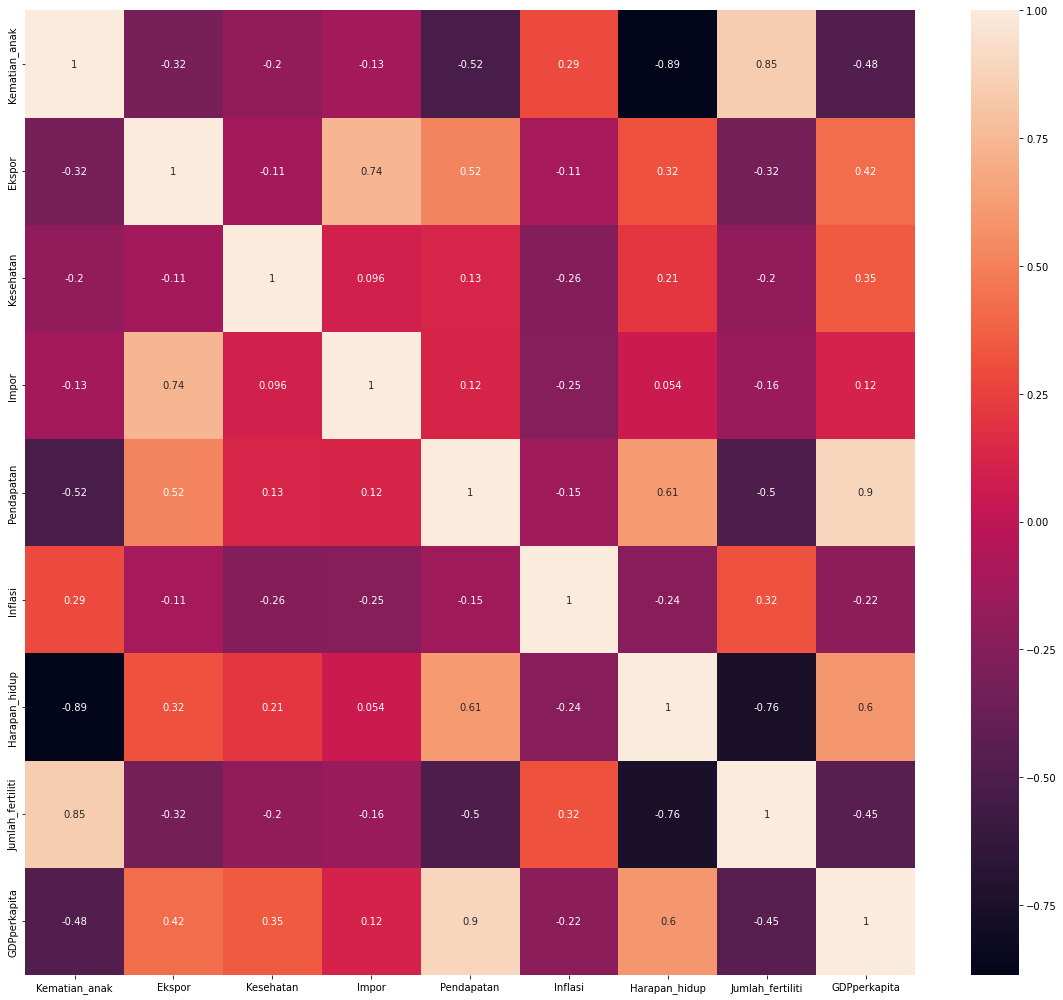

In [55]:
# Visualize data with heatmap to show correlation between variables
plt.figure(figsize=(16,14))
sns.heatmap(df.corr(), annot=True, fmt='.2g')
plt.tight_layout()
plt.show()

(---- **Perhatikan bahwa
jika a dan b berkorelasi positif, berarti jika a meningkat, maka b juga akan meningkat. Sebaliknya, jika a dan b berkorelasi negatif, artinya jika a meningkat, maka b akan berkurang.** ----) <br/><br/>
Dari pairplot dan heatmap di atas, kita bisa mendapatkan beberapa insight. <br />
* 'PDB Perkapita' dan 'Pendapatan' memiliki korelasi positif yang tinggi (0,9). Artinya negara yang memiliki 'Pendapatan' tinggi juga akan memiliki 'PDB Perkapita' yang tinggi.
* 'Kematian_anak' and 'Jumlah_fertiliti' also have a high positive correlation (0.85).
* 'Impor' and 'Ekspor' also have a high positive correlation (0.74).
* 'Pendapatan' and 'Harapan_hidup' also have a high positive correlation (0.61).
* 'GDPperkapita' and 'Harapan_hidup' also have a high positive correlation (0.6).
* 'Harapan_hidup' dan 'Jumlah_fertiliti' memiliki korelasi negatif yang tinggi (-0,76). Artinya negara yang memiliki 'Harapan_hidup' yang tinggi akan memiliki 'Jumlah_fertiliti' yang rendah.
* 'Harapan_hidup' and 'Kematian_anak' also have a high negative correlation (-0.89).

# **3. Outliers Treatment** <br/> 

(---- ***The Following Statements Are Taken From Kaggle*** ----) <br/>
There are different ranges in capping the outliers:
* Soft range: 1th and 99th percentile.
* Mid range: 5th and 95th percentile.
* 25th and 75th percentile.

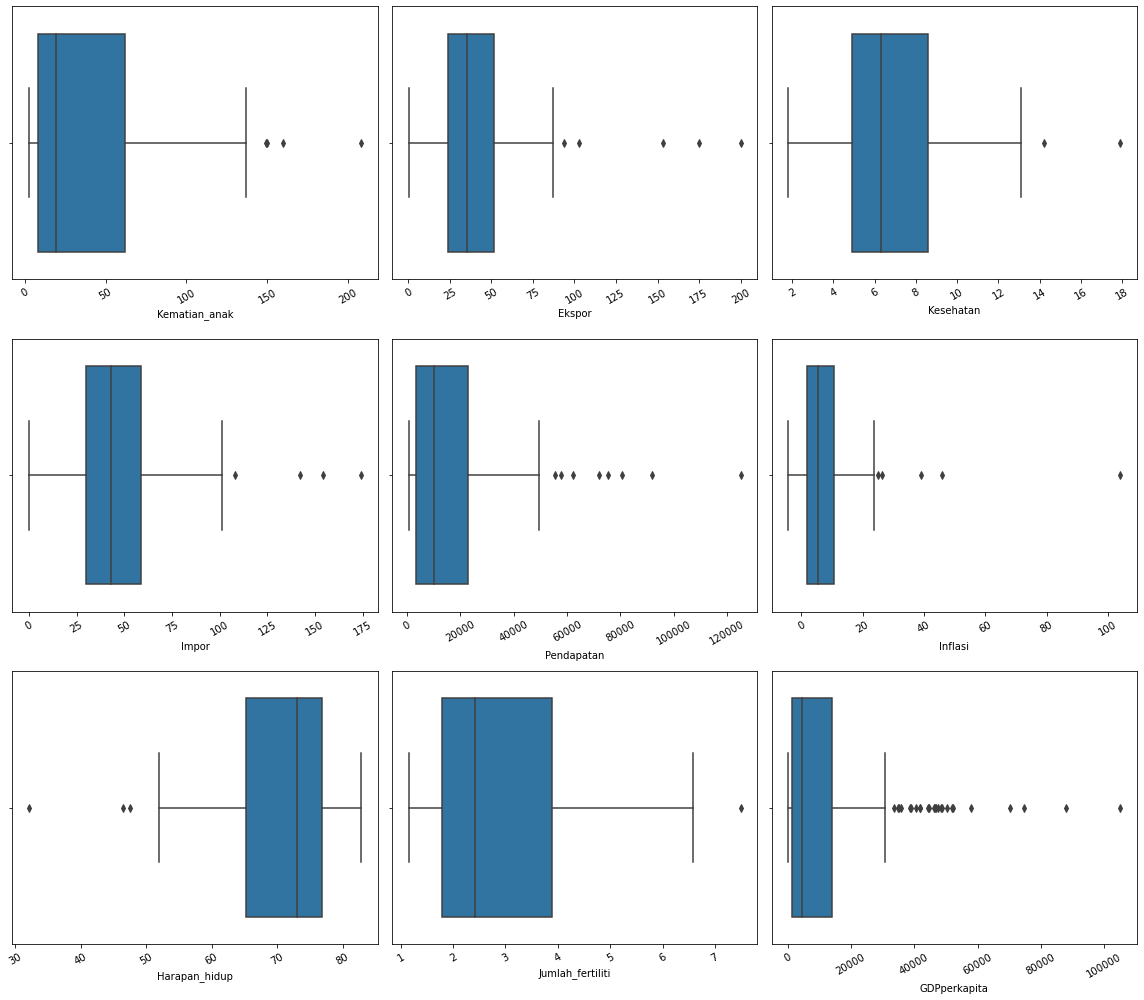

In [57]:
# Visualize numerical columns with boxplots to see outliers
plt.figure(figsize=(16,14))

for i in enumerate(df.describe().columns):
  plt.subplot(3, 3, i[0]+1)
  sns.boxplot(df[i[1]])
  plt.xticks(rotation=30)

plt.tight_layout()
plt.show()

Dari boxplot di atas, kita tahu bahwa setiap kolom dari dataframe memiliki outlier. Meskipun outlier dapat mempengaruhi hasil clustering, namun outlier tidak dapat dihilangkan. Penghapusan outlier akan berdampak pada pemeringkatan negara-negara yang membutuhkan bantuan keuangan dari HELP International. Oleh karena itu, kami akan menggunakan pendekatan lain dengan membatasi outlier karena tujuan kami adalah untuk menemukan daftar negara yang membutuhkan bantuan keuangan dari HELP International. Oleh karena itu, kita dapat membatasi sebagian kecil dari outlier. Untuk meminimalkan bias, pembatasan akan didasarkan pada persentil ke-99. </br>
</br>
Pencilan dibatasi dalam fitur-fitur ini (Kebanyakan fitur outlier): 'Ekspor', 'Impor' , 'Pendapatan', 'Kesehatan', 'Inflasi' dan 'GDPperkapita' </br>
</br>
Pencilan tidak dibatasi dalam fitur ini : 'Kematian_anak', 'Harapan_hidup' , dan 'Jumlah_fertiliti'.</br>

In [58]:
#cap the outliers
cap_features = ['Ekspor', 'Kesehatan', 'Impor','Inflasi','GDPperkapita']
new_df = df.copy()
for col in cap_features:
    q4 = new_df[col].quantile(0.99)
    new_df.loc[new_df[col] >= q4, col] = q4

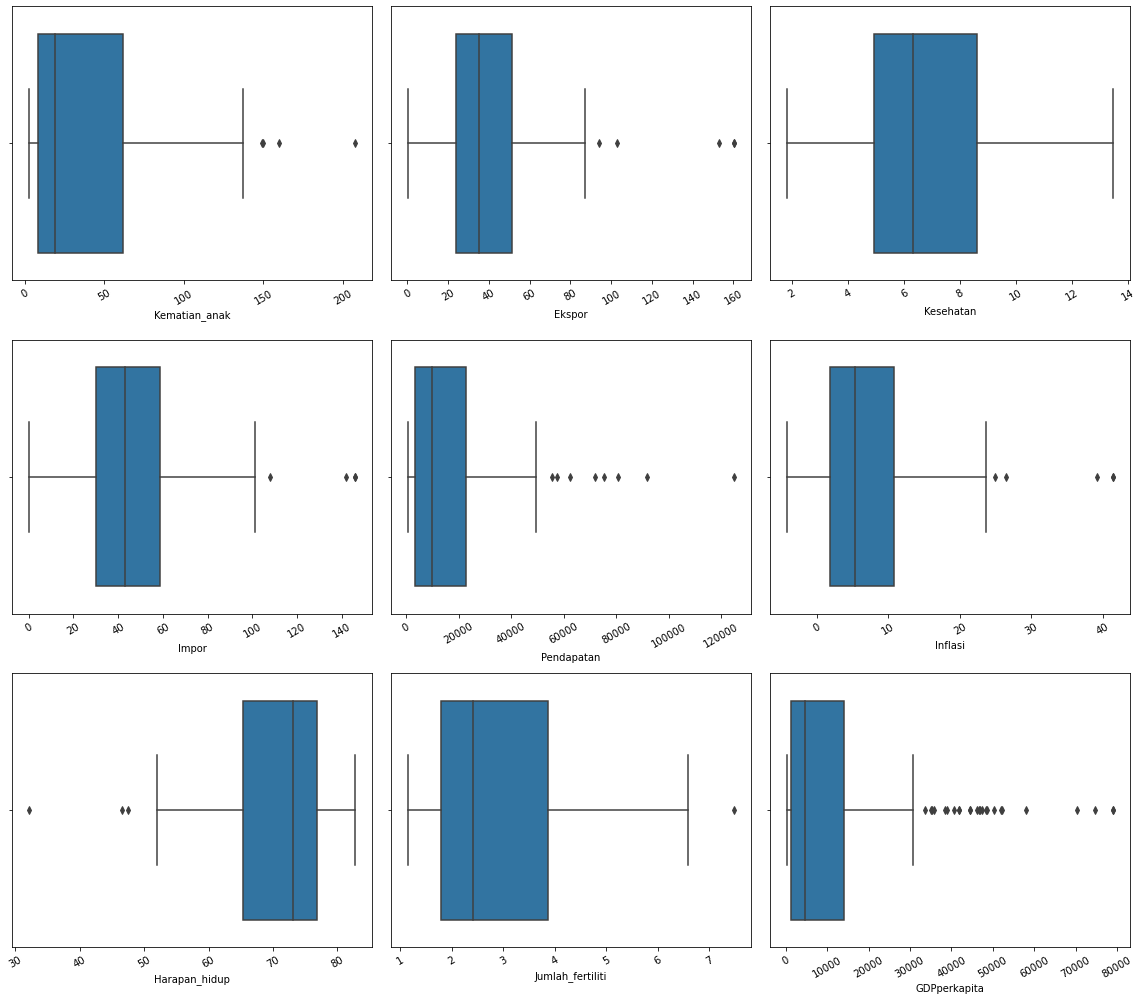

In [59]:
# Visualize numerical columns with boxplots after capping the outliers
plt.figure(figsize=(16,14))

for i in enumerate(new_df.describe().columns):
  plt.subplot(3, 3, i[0]+1)
  sns.boxplot(new_df[i[1]])
  plt.xticks(rotation=30)

plt.tight_layout()
plt.show()

# **4. Scaling Data** <br/> 

To make the clustering more accurate, we standardize the data by rescaling it using the standard scaler provided by scikit-learn.

In [60]:
# Drop non-numeric column so we can scale the data
num_df = new_df.drop(columns='Negara')
display(num_df)

,Kematian_anak,Ekspor,Kesehatan,Impor,Pendapatan,Inflasi,Harapan_hidup,Jumlah_fertiliti,GDPperkapita
0,90.2,10.0,7.58,44.9,1610,9.440,56.2,5.82,553.0
1,16.6,28.0,6.55,48.6,9930,4.490,76.3,1.65,4090.0
2,27.3,38.4,4.17,31.4,12900,16.100,76.5,2.89,4460.0
3,119.0,62.3,2.85,42.9,5900,22.400,60.1,6.16,3530.0
4,10.3,45.5,6.03,58.9,19100,1.440,76.8,2.13,12200.0
...,...,...,...,...,...,...,...,...,...
162,29.2,46.6,5.25,52.7,2950,2.620,63.0,3.50,2970.0
163,17.1,28.5,4.91,17.6,16500,41.478,75.4,2.47,13500.0
164,23.3,72.0,6.84,80.2,4490,12.100,73.1,1.95,1310.0
165,56.3,30.0,5.18,34.4,4480,23.600,67.5,4.67,1310.0


In [61]:
# Resacle the data using Standar Scaler
sc = StandardScaler()
scaled_df = sc.fit_transform(num_df)
scaled_df

array([[ 1.29153238, -1.19927911,  0.30123858, ..., -1.61909203,
         1.90288227, -0.70225949],
       [-0.5389489 , -0.49806893, -0.08896601, ...,  0.64786643,
        -0.85997281, -0.49872564],
       [-0.27283273, -0.09292528, -0.99060381, ...,  0.67042323,
        -0.0384044 , -0.47743428],
       ...,
       [-0.37231541,  1.21600038,  0.02089742, ...,  0.28695762,
        -0.66120626, -0.65869853],
       [ 0.44841668, -0.42015669, -0.60797601, ..., -0.34463279,
         1.14094382, -0.65869853],
       [ 1.11495062, -0.14746385, -0.33900002, ..., -2.09278484,
         1.6246091 , -0.6500669 ]])

In [63]:
# Check top 5 rows scaled dataframe
scaled_df = pd.DataFrame(scaled_df, columns = num_df.columns)
display(scaled_df.head())

,Kematian_anak,Ekspor,Kesehatan,Impor,Pendapatan,Inflasi,Harapan_hidup,Jumlah_fertiliti,GDPperkapita
0,1.291532,-1.199279,0.301239,-0.076771,-0.808245,0.265002,-1.619092,1.902882,-0.702259
1,-0.538949,-0.498069,-0.088966,0.083204,-0.375369,-0.372075,0.647866,-0.859973,-0.498726
2,-0.272833,-0.092925,-0.990604,-0.660465,-0.220844,1.122161,0.670423,-0.038404,-0.477434
3,2.007808,0.838126,-1.490672,-0.163244,-0.585043,1.932987,-1.179234,2.128151,-0.530950
4,-0.695634,0.183663,-0.285963,0.528541,0.101732,-0.764618,0.704258,-0.541946,-0.032042


# **5. Creating KMeans Clustering and Visualizing Clusters Formed** <br/> 

**Create random clustering first and visualize it**

In [64]:
# Clustering with n_cluster 2
kmeans1 = KMeans(n_clusters = 2, random_state = 42).fit(scaled_df)
labels1 = kmeans1.labels_

In [65]:
# Check after 2-clustering
print('n-cluster = 2 (Not a good cluster)')
print()
_tempdf = new_df.copy()
_tempdf['kmeans_2cluster'] = labels1
print('Cluster and its countries quantity :')
display(_tempdf.kmeans_2cluster.value_counts(ascending=True))
print()
display(_tempdf.head())

n-cluster = 2 (Not a good cluster)

Cluster and its countries quantity :


1    72
0    95
Name: kmeans_2cluster, dtype: int64

,Negara,Kematian_anak,Ekspor,Kesehatan,Impor,Pendapatan,Inflasi,Harapan_hidup,Jumlah_fertiliti,GDPperkapita,kmeans_2cluster
0,Afghanistan,90.2,10.0,7.58,44.9,1610,9.44,56.2,5.82,553.0,1
1,Albania,16.6,28.0,6.55,48.6,9930,4.49,76.3,1.65,4090.0,0
2,Algeria,27.3,38.4,4.17,31.4,12900,16.10,76.5,2.89,4460.0,1
3,Angola,119.0,62.3,2.85,42.9,5900,22.40,60.1,6.16,3530.0,1
4,Antigua and Barbuda,10.3,45.5,6.03,58.9,19100,1.44,76.8,2.13,12200.0,0


<Figure size 1152x1440 with 0 Axes>

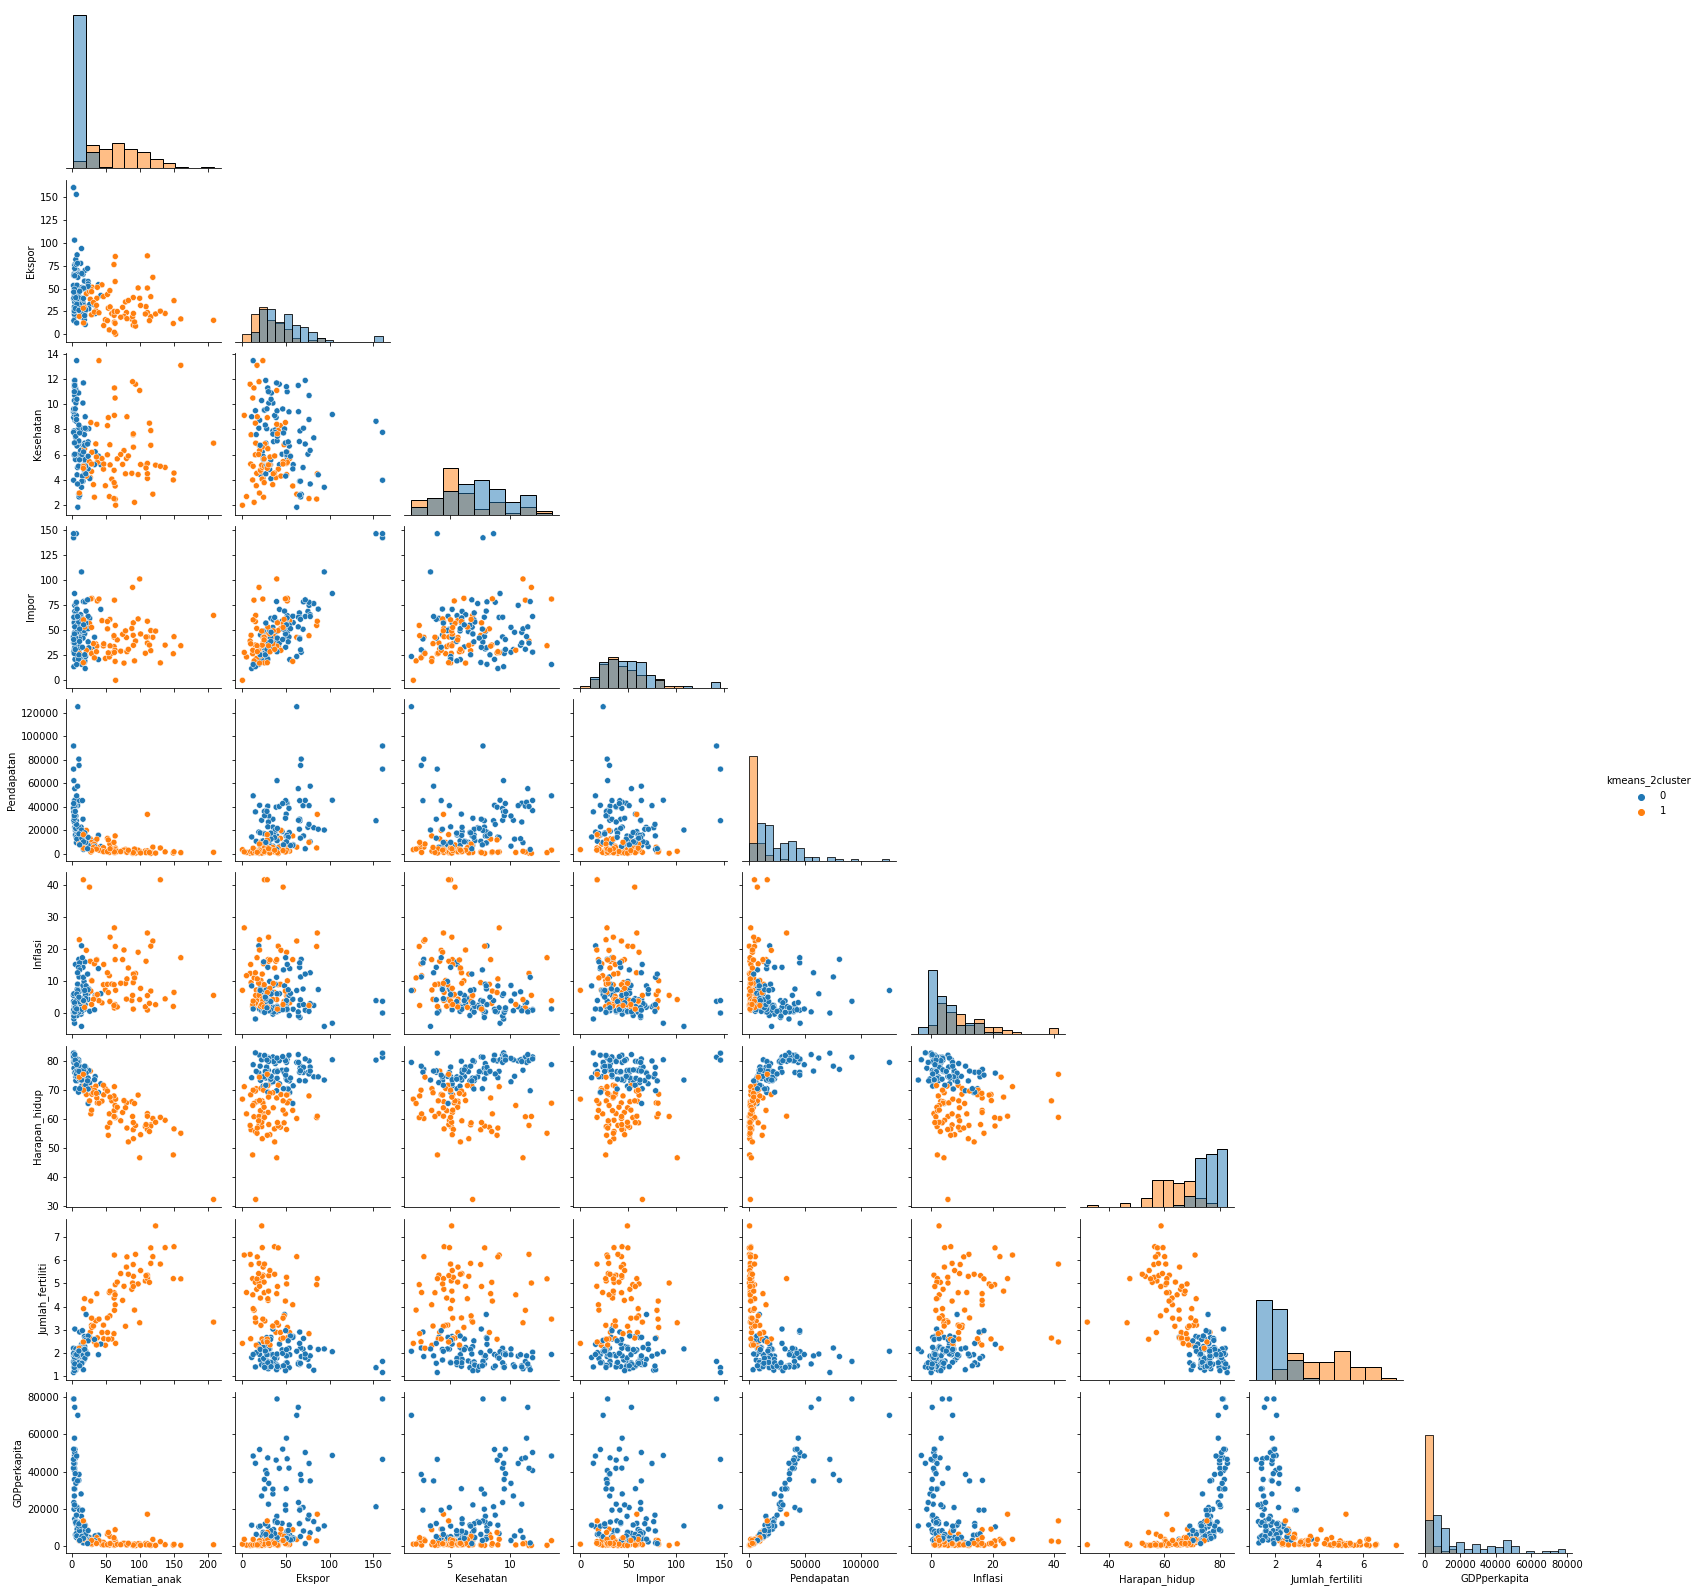

In [66]:
# Visualize the 2-clusters
plt.figure(figsize=(16,20))
g = sns.pairplot(_tempdf, hue="kmeans_2cluster", diag_kind="hist", corner=True)
plt.show()

**Create functions for Elbow method**

In [67]:
# Elbow Method to find most accurate n-cluster
def elbowMethod(data, k_min=2, k_max= 10):
    wcss = [] # Within Cluster Sum of Squares
    k_range = range(k_min, k_max + 1)

    for i in k_range:
      kmeans_test = KMeans(n_clusters = i, random_state = 42, init = 'k-means++')
      kmeans_test.fit(data)
      wcss.append(kmeans_test.inertia_)

    fig, ax = plt.subplots(figsize=(15,8))
    ax.plot(k_range, wcss, marker='o')

    for i, value in enumerate(wcss):
        ax.text(i+2.15, value-0.005, round(value,3))

    plt.axvline(x = 4, color = 'r')
    plt.title('The Elbow Method')
    plt.xlabel('Number of clusters')
    plt.ylabel('WCSS')
    plt.show()

**Create functions for silhoutte method**

In [68]:
# silhouette Method to find most accurate n-cluster
def silMethod(data, k_min=2, k_max=10):
    sil_score = []
    k_range = range(k_min, k_max+1)

    for k in k_range:
        model2 = KMeans(n_clusters = k)
        model2.fit(data)
        labels = model2.labels_
        s_score = silhouette_score(data, labels, metric='euclidean')
        sil_score.append(s_score)
        
    fig, ax = plt.subplots(figsize=(15,8))
    ax.plot(k_range, sil_score, marker='o')

    for i, value in enumerate(sil_score):
        ax.text(i+2.15, value-0.005, round(value,3))

    plt.xticks(k_range)
    plt.axvline(x = 4, color = 'r')
    plt.title('Silhouette Method')
    plt.xlabel('Number of clusters')
    plt.ylabel('Silhouette Score')
    plt.show()

Elbow Method



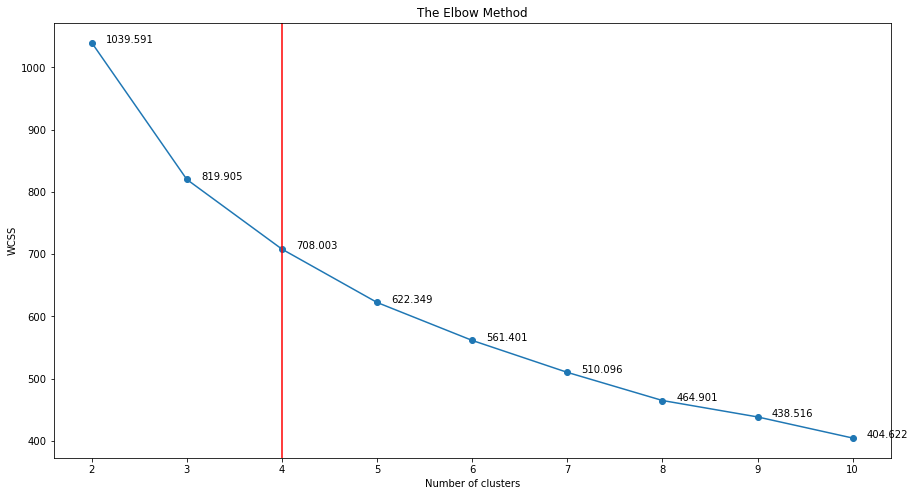

In [69]:
print('Elbow Method')
print()
elbowMethod(scaled_df)

Silhouette Method



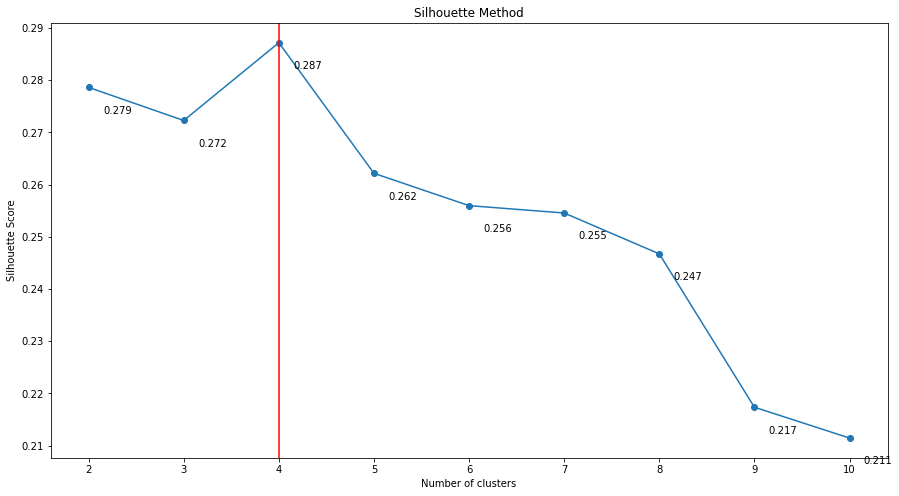

In [70]:
print('Silhouette Method')
print()
silMethod(scaled_df)

We can see from elbow point and silhouette score, the best clusters we can get are 3-clusters or 4-clusters. We can pick 4-clusters because they tend to have higher silhouette score.

In [72]:
# Clustering with n_cluster 4
kmeans2 = KMeans(n_clusters = 4, random_state = 42).fit(scaled_df)
labels2 = kmeans2.labels_

In [73]:
# Check after 4-clustering
print('n-cluster = 4')
print()
new_df['Cluster'] = labels2
print('Cluster and its countries quantity :')
display(new_df.Cluster.value_counts(ascending=True))
print()
display(new_df.head())

n-cluster = 4

Cluster and its countries quantity :


2     3
3    32
1    46
0    86
Name: Cluster, dtype: int64

,Negara,Kematian_anak,Ekspor,Kesehatan,Impor,Pendapatan,Inflasi,Harapan_hidup,Jumlah_fertiliti,GDPperkapita,Cluster
0,Afghanistan,90.2,10.0,7.58,44.9,1610,9.44,56.2,5.82,553.0,1
1,Albania,16.6,28.0,6.55,48.6,9930,4.49,76.3,1.65,4090.0,0
2,Algeria,27.3,38.4,4.17,31.4,12900,16.10,76.5,2.89,4460.0,0
3,Angola,119.0,62.3,2.85,42.9,5900,22.40,60.1,6.16,3530.0,1
4,Antigua and Barbuda,10.3,45.5,6.03,58.9,19100,1.44,76.8,2.13,12200.0,0


In [75]:
# Display mean statistic of each columns after 4-clustering to represents centroids
analysis_res = new_df.groupby('Cluster').agg({'mean'})
analysis_res['Banyak_negara'] = new_df.groupby('Cluster')['Negara'].count()
display(analysis_res)

,Kematian_anak,Ekspor,Kesehatan,Impor,Pendapatan,Inflasi,Harapan_hidup,Jumlah_fertiliti,GDPperkapita,Banyak_negara
,mean,mean,mean,mean,mean,mean,mean,mean,mean,
Cluster,,,,,,,,,,
0,22.048837,41.103360,6.213070,47.954255,12678.720930,7.573163,72.688372,2.307442,6517.581395,86
1,93.841304,28.837174,6.346957,42.128261,3738.978261,10.727891,59.232609,5.054348,1826.130435,46
2,4.133333,157.986667,6.793333,144.720000,64033.333333,2.468000,81.433333,1.380000,48929.333333,3
3,5.181250,46.118750,8.950125,40.584375,44021.875000,2.513844,80.081250,1.788437,41846.500000,32


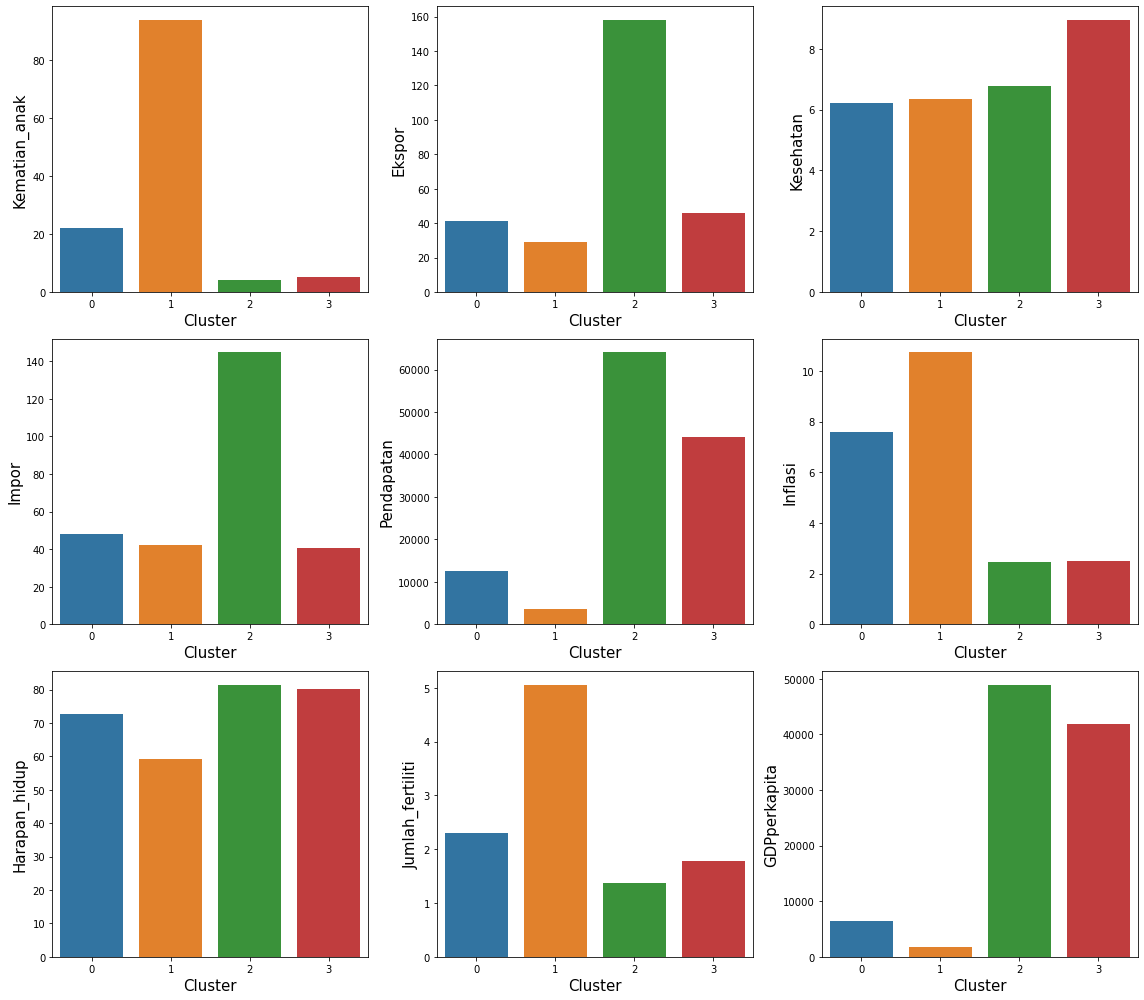

In [76]:
# Visualize mean statistic of each columns after 4-clustering
plt.figure(figsize=(16, 14))
for i, var in enumerate(num_df.columns):
    plt.subplot(3,3,i+1)
    sns.barplot(x = analysis_res.reset_index().Cluster, y = analysis_res[var]['mean'])
    plt.ylabel(var, fontsize=15)
    plt.xlabel('Cluster', fontsize=15)
plt.tight_layout()    
plt.show()    

Based on the graphs above, we should consider cluster 2 countries for aid recommendation because all of the data features representing cluster 2 are the closest to the characteristics of underdeveloped countries that need financial aid. Here are the reasons why we should choose cluster 2 as an option.
* Highest 'Kematian_anak'
* Lowest 'Ekspor'
* Comparatively low 'Kesehatan'
* Comparatively Low 'Impor'
* Lowest 'Pendapatan'
* Highest 'Inflasi'
* Lowest 'Harapan_hidup'
* Highest 'Jumlah_fertiliti'
* Lowest 'GDPperkapita'


# **6. Report Countries** <br/> 

**Recommendation for HELP International**

Due to financial limitations owned by HELP International, it is best to choose the most underdeveloped countries. Therefore, we will pick at least 5 of the most underdeveloped countries based by the following criterias.
* Highest 'Kematian_anak'
* Lowest 'Ekspor'
* Lowest 'Kesehatan'
* Highest 'Impor'
* Lowest 'Pendapatan'
* Highest 'Inflasi'
* Lowest 'Harapan_hidup'
* Highest 'Jumlah_fertiliti'
* Lowest 'GDPperkapita'

In [78]:
# SHow top 5 countries as a recomendation result
result = new_df[new_df['Cluster']==1]
result.sort_values(['GDPperkapita','Pendapatan','Kematian_anak','Kesehatan','Inflasi','Harapan_hidup','Jumlah_fertiliti','Impor','Ekspor'],
                  ascending=[True,True,False,True,False,True,False,False,True]).head()

,Negara,Kematian_anak,Ekspor,Kesehatan,Impor,Pendapatan,Inflasi,Harapan_hidup,Jumlah_fertiliti,GDPperkapita,Cluster
26,Burundi,93.6,8.92,11.60,39.2,764,12.30,57.7,6.26,231.0,1
88,Liberia,89.3,19.10,11.80,92.6,700,5.47,60.8,5.02,327.0,1
37,"Congo, Dem. Rep.",116.0,41.10,7.91,49.6,609,20.80,57.5,6.54,334.0,1
112,Niger,123.0,22.20,5.16,49.1,814,2.55,58.8,7.49,348.0,1
132,Sierra Leone,160.0,16.80,13.10,34.5,1220,17.20,55.0,5.20,399.0,1
